In [1]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

from os.path import join
ruta = 'C:\Diplomado_IA_PUCP\Visualizacion_de_datos\proyecto'

In [2]:
# Import a shape file
region_geojson = geopandas.read_file(join(ruta,'peru-geojson-master\peru_departamental_simple.geojson'))
region_geojson.head()
#countries = geopandas.read_file(join(ruta,'peru_provincial_simple.shp'))

#print(countries.head())

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


## INFORMACION DE CAMAS DE HOSPITALIZACION Y UCI

In [27]:
camas = pd.read_csv(join(ruta,'Camas_21-05-2021.csv'),sep='|')[['FECHACORTE','REGION','PROVINCIA','DISTRITO',
                                                                'ZC_UCI_ADUL_CAM_TOTAL',
                                                                'ZC_UCI_ADUL_CAM_INOPERATIVOS',
                                                                'ZC_UCI_ADUL_CAM_TOT_OPER',
                                                                'ZC_UCI_ADUL_CAM_TOT_DISP',
                                                                'ZC_UCI_ADUL_CAM_TOT_OCUP',
                                                                'ZC_HOSP_ADUL_CAM_TOTAL',
                                                                'ZC_HOSP_ADUL_CAM_INOPERATIVOS',
                                                                'ZC_HOSP_ADUL_CAM_TOT_OPER',
                                                                'ZC_HOSP_ADUL_CAM_TOT_DISP',
                                                                'ZC_HOSP_ADUL_CAM_TOT_OCUP']]
camas.dropna(subset=['REGION', 'PROVINCIA','DISTRITO'],inplace=True)
camas.fillna(0,inplace=True)

In [28]:
camas.isna().sum()

FECHACORTE                       0
REGION                           0
PROVINCIA                        0
DISTRITO                         0
ZC_UCI_ADUL_CAM_TOTAL            0
ZC_UCI_ADUL_CAM_INOPERATIVOS     0
ZC_UCI_ADUL_CAM_TOT_OPER         0
ZC_UCI_ADUL_CAM_TOT_DISP         0
ZC_UCI_ADUL_CAM_TOT_OCUP         0
ZC_HOSP_ADUL_CAM_TOTAL           0
ZC_HOSP_ADUL_CAM_INOPERATIVOS    0
ZC_HOSP_ADUL_CAM_TOT_OPER        0
ZC_HOSP_ADUL_CAM_TOT_DISP        0
ZC_HOSP_ADUL_CAM_TOT_OCUP        0
dtype: int64

In [29]:
camas

,FECHACORTE,REGION,PROVINCIA,DISTRITO,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_CAM_TOTAL,ZC_HOSP_ADUL_CAM_INOPERATIVOS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_DISP,ZC_HOSP_ADUL_CAM_TOT_OCUP
0,20210331,LIMA,LIMA,SANTIAGO DE SURCO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20210331,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0.0,0.0,0.0,0.0,0.0,50.0,0.0,50.0,14.0,36.0
2,20210331,PIURA,SULLANA,SULLANA,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,10.0
3,20210331,ANCASH,SANTA,CHIMBOTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20210331,ANCASH,SANTA,CHIMBOTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28029,20210521,JUNIN,HUANCAYO,EL TAMBO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28030,20210521,UCAYALI,ATALAYA,RAIMONDI,2.0,2.0,0.0,0.0,0.0,16.0,0.0,16.0,8.0,8.0
28031,20210521,LIMA,LIMA,LOS OLIVOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28032,20210521,LIMA,LIMA,LA MOLINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
camas.groupby('FECHACORTE').count()

,REGION,PROVINCIA,DISTRITO,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_CAM_TOTAL,ZC_HOSP_ADUL_CAM_INOPERATIVOS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_DISP,ZC_HOSP_ADUL_CAM_TOT_OCUP
FECHACORTE,,,,,,,,,,,,,
20210331,481,481,481,481,481,481,481,481,481,481,481,481,481
20210401,499,499,499,499,499,499,499,499,499,499,499,499,499
20210402,505,505,505,505,505,505,505,505,505,505,505,505,505
20210403,515,515,515,515,515,515,515,515,515,515,515,515,515
20210404,515,515,515,515,515,515,515,515,515,515,515,515,515
20210405,522,522,522,522,522,522,522,522,522,522,522,522,522
20210406,523,523,523,523,523,523,523,523,523,523,523,523,523
20210407,524,524,524,524,524,524,524,524,524,524,524,524,524
20210408,524,524,524,524,524,524,524,524,524,524,524,524,524


In [31]:
camas_today = camas[camas['FECHACORTE']==20210520]
camas_today

,FECHACORTE,REGION,PROVINCIA,DISTRITO,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_CAM_TOTAL,ZC_HOSP_ADUL_CAM_INOPERATIVOS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_DISP,ZC_HOSP_ADUL_CAM_TOT_OCUP
26930,20210520,LIMA,LIMA,SANTIAGO DE SURCO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26931,20210520,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0.0,0.0,0.0,0.0,0.0,30.0,0.0,30.0,16.0,14.0
26932,20210520,PIURA,SULLANA,SULLANA,0.0,0.0,0.0,0.0,0.0,16.0,0.0,16.0,4.0,12.0
26933,20210520,ANCASH,SANTA,CHIMBOTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26934,20210520,ANCASH,SANTA,CHIMBOTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27477,20210520,JUNIN,HUANCAYO,EL TAMBO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27478,20210520,UCAYALI,ATALAYA,RAIMONDI,2.0,2.0,0.0,0.0,0.0,24.0,0.0,24.0,18.0,6.0
27479,20210520,LIMA,LIMA,LOS OLIVOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27480,20210520,LIMA,LIMA,LA MOLINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
camas_today_resume = camas_today.groupby("REGION").sum().reset_index().drop('FECHACORTE',axis=1)
camas_today_resume['pct_uso_UCI'] = camas_today_resume['ZC_UCI_ADUL_CAM_TOT_OCUP']/camas_today_resume['ZC_UCI_ADUL_CAM_TOT_OPER']
camas_today_resume['pct_uso_HOSP'] = camas_today_resume['ZC_HOSP_ADUL_CAM_TOT_OCUP']/camas_today_resume['ZC_HOSP_ADUL_CAM_TOT_OPER']
camas_today_resume

,REGION,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_CAM_TOTAL,ZC_HOSP_ADUL_CAM_INOPERATIVOS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_DISP,ZC_HOSP_ADUL_CAM_TOT_OCUP,pct_uso_UCI,pct_uso_HOSP
0,AMAZONAS,11.0,0.0,11.0,0.0,11.0,97.0,0.0,97.0,59.0,38.0,1.000000,0.391753
1,ANCASH,60.0,0.0,60.0,0.0,60.0,557.0,0.0,557.0,194.0,363.0,1.000000,0.651706
2,APURIMAC,26.0,1.0,25.0,0.0,25.0,149.0,0.0,149.0,99.0,50.0,1.000000,0.335570
3,AREQUIPA,126.0,0.0,126.0,0.0,126.0,1032.0,0.0,1032.0,198.0,834.0,1.000000,0.808140
4,AYACUCHO,20.0,0.0,20.0,1.0,19.0,281.0,0.0,281.0,160.0,121.0,0.950000,0.430605
5,CAJAMARCA,60.0,0.0,60.0,11.0,49.0,491.0,0.0,491.0,289.0,202.0,0.816667,0.411405
6,CALLAO,125.0,0.0,125.0,0.0,125.0,610.0,33.0,577.0,171.0,406.0,1.000000,0.703640
7,CUSCO,60.0,1.0,59.0,0.0,59.0,398.0,0.0,398.0,194.0,204.0,1.000000,0.512563
8,HUANCAVELICA,18.0,0.0,18.0,1.0,17.0,132.0,0.0,132.0,79.0,53.0,0.944444,0.401515
9,HUANUCO,41.0,2.0,39.0,1.0,38.0,83.0,0.0,83.0,16.0,67.0,0.974359,0.807229


In [72]:
camas_today_resume.to_csv(join(ruta,'camas_today_resume.csv'),index=False)

In [73]:
camas_today_resume['TOTAL']=1
camas_today_resume_kpi = camas_today_resume.groupby('TOTAL').sum().reset_index()

In [74]:
camas_today_resume_kpi

,TOTAL,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_CAM_TOTAL,ZC_HOSP_ADUL_CAM_INOPERATIVOS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_DISP,ZC_HOSP_ADUL_CAM_TOT_OCUP,pct_uso_UCI,pct_uso_HOSP
0,1,2487.0,24.0,2463.0,57.0,2406.0,15311.0,52.0,15259.0,5908.0,9351.0,23.48704,12.535514


In [75]:
import plotly.graph_objects as go

pct = camas_today_resume_kpi['ZC_UCI_ADUL_CAM_TOT_OCUP'][0]/camas_today_resume_kpi['ZC_UCI_ADUL_CAM_TOT_OPER'][0]
print(pct)
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = camas_today_resume_kpi['ZC_UCI_ADUL_CAM_TOT_OCUP'][0],
    mode = "gauge+number+delta",
    title = {'text': "Capacidad Camas UCI"},
    delta = {'reference': camas_today_resume_kpi['ZC_UCI_ADUL_CAM_TOT_OPER'][0]},
    gauge = {'axis': {'range': [None, camas_today_resume_kpi['ZC_UCI_ADUL_CAM_TOT_OPER'][0]]}}
             ))
fig.show()

0.976857490864799


In [76]:
# Import a shape file
region_geojson = geopandas.read_file(join(ruta,'peru-geojson-master\peru_departamental_simple.geojson'))
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [77]:
region_geojson_camas = pd.merge(region_geojson,camas_today_resume,how='left',left_on='NOMBDEP', right_on='REGION')
region_geojson_camas

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,REGION,ZC_UCI_ADUL_CAM_TOTAL,ZC_UCI_ADUL_CAM_INOPERATIVOS,ZC_UCI_ADUL_CAM_TOT_OPER,ZC_UCI_ADUL_CAM_TOT_DISP,ZC_UCI_ADUL_CAM_TOT_OCUP,ZC_HOSP_ADUL_CAM_TOTAL,ZC_HOSP_ADUL_CAM_INOPERATIVOS,ZC_HOSP_ADUL_CAM_TOT_OPER,ZC_HOSP_ADUL_CAM_TOT_DISP,ZC_HOSP_ADUL_CAM_TOT_OCUP,pct_uso_UCI,pct_uso_HOSP,TOTAL
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",AMAZONAS,11.0,0.0,11.0,0.0,11.0,97.0,0.0,97.0,59.0,38.0,1.000000,0.391753,1
1,ANCASH,166,02,3.596225e+06,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",ANCASH,60.0,0.0,60.0,0.0,60.0,557.0,0.0,557.0,194.0,363.0,1.000000,0.651706,1
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",APURIMAC,26.0,1.0,25.0,0.0,25.0,149.0,0.0,149.0,99.0,50.0,1.000000,0.335570,1
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",AREQUIPA,126.0,0.0,126.0,0.0,126.0,1032.0,0.0,1032.0,198.0,834.0,1.000000,0.808140,1
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",AYACUCHO,20.0,0.0,20.0,1.0,19.0,281.0,0.0,281.0,160.0,121.0,0.950000,0.430605,1
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999...",CAJAMARCA,60.0,0.0,60.0,11.0,49.0,491.0,0.0,491.0,289.0,202.0,0.816667,0.411405,1
6,CALLAO,6,07,1.414095e+04,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8...",CALLAO,125.0,0.0,125.0,0.0,125.0,610.0,33.0,577.0,171.0,406.0,1.000000,0.703640,1
7,CUSCO,108,08,7.207614e+06,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6...",CUSCO,60.0,1.0,59.0,0.0,59.0,398.0,0.0,398.0,194.0,204.0,1.000000,0.512563,1
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0...",HUANCAVELICA,18.0,0.0,18.0,1.0,17.0,132.0,0.0,132.0,79.0,53.0,0.944444,0.401515,1
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467...",HUANUCO,41.0,2.0,39.0,1.0,38.0,83.0,0.0,83.0,16.0,67.0,0.974359,0.807229,1


(-81.96178512512749,
 -68.02078909138794,
 -19.266543824008192,
 0.8770101196814104)

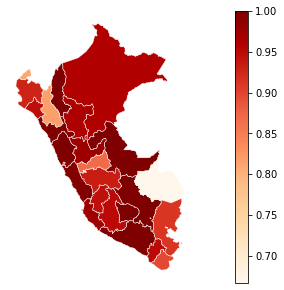

In [78]:
region_geojson_camas.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='pct_uso_UCI',legend=True,cmap='OrRd').axis('off')

(-81.96178512512749,
 -68.02078909138794,
 -19.266543824008192,
 0.8770101196814104)

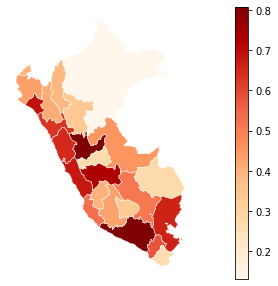

In [79]:
region_geojson_camas.plot( linewidth=0.5, edgecolor='white', figsize=(15,5),column='pct_uso_HOSP',legend=True,cmap='OrRd').axis('off')